# BLM example

In [1]:
# Add pytwoway to system path, do not run this
# import sys
# sys.path.append('../../..')

In [2]:
# Import the pytwoway package 
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
import pandas as pd
from matplotlib import pyplot as plt

## Simulate some data

The package contains functions to simulate data. We use this here to keep things simple.

In [3]:
# For the example, we simulate data
# Set parameter choices
nl = 2 # Number of worker types
nk = 3 # Number of firm types
fsize = 10 # Max number of employees at a firm
mmult = 100 # Increase observations for movers x100
smult = 100 # Increase observations for stayers x100
blm_true = tw.BLMModel({
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'simulation': True # Simulating data
})
sim_data = blm_true._m2_mixt_simulate_sim(fsize=fsize, mmult=mmult, smult=smult)
display(sim_data['jdata'])
display(sim_data['sdata'])

,l,y1,y2,j1,j2,j1true,j2true,f1,f2
0,0,0.641603,0.231993,0,0,0,0,F66,F68
1,0,0.654136,-0.048505,0,0,0,0,F86,F94
2,0,0.252469,0.383205,0,0,0,0,F57,F62
3,1,0.157884,0.837490,0,0,0,0,F18,F53
4,0,0.599868,0.245138,0,0,0,0,F0,F92
...,...,...,...,...,...,...,...,...,...
8995,0,0.388565,0.080482,2,2,2,2,F15,F37
8996,0,1.228420,1.047240,2,2,2,2,F32,F90
8997,0,0.513434,0.902969,2,2,2,2,F47,F45
8998,0,1.156718,0.741670,2,2,2,2,F5,F102


,k,y1,y2,j1,j2,x,f1,j1true,f2
0,1,0.496445,0.450143,0,0,1,F68,0,F68
1,1,1.163346,0.281585,0,0,1,F71,0,F71
2,0,0.213269,0.259737,0,0,1,F27,0,F27
3,0,0.544546,0.657220,0,0,1,F70,0,F70
4,1,0.802393,0.676595,0,0,1,F87,0,F87
...,...,...,...,...,...,...,...,...,...
2995,1,1.222266,0.649494,2,2,1,F93,2,F93
2996,1,1.329100,0.966668,2,2,1,F90,2,F90
2997,1,1.678331,1.271155,2,2,1,F4,2,F4
2998,1,1.264477,0.994830,2,2,1,F99,2,F99


## Initialize and run BLMEstimator

In [4]:
## Optional Parameters ##
user_blm = {
    # Class parameters
    'nl': nl, # Number of worker types
    'nk': nk, # Number of firm types
    'fixb': False, # Set A2 = np.mean(A2, axis=0) + A1 - np.mean(A1, axis=0)
    'stationary': False, # Set A1 = A2
    # fit() parameters
    'n_iters': 10000, # Max number of iterations
    'threshold': 1e-7, # Threshold to break EM loop
    'd_prior': 1.0001, # Value >= 1, account for probabilities being too small
    'verbose': 0, # If 0, print no output; if 1, print additional output; if 2, print maximum output
}
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(user_blm)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=10, n_best=2, ncore=4)

100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


## Finally, we can investigate the results

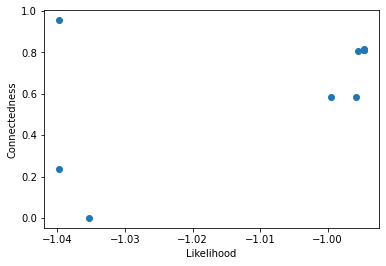

In [5]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

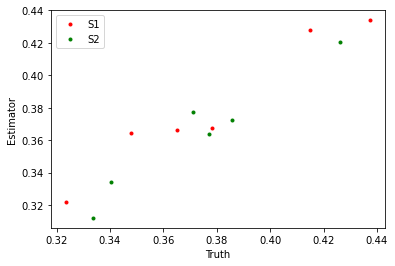

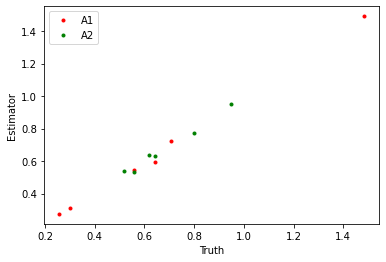

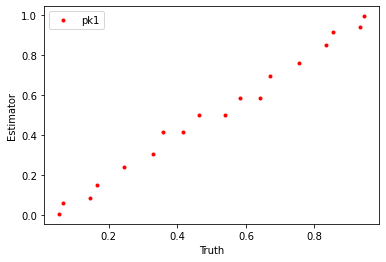

In [6]:
# Plot parameter truth vs. estimates
plt.plot(blm_true.S1.flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(blm_true.S2.flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.A1.flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(blm_true.A2.flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()

plt.plot(blm_true.pk1.flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimator')
plt.legend()
plt.show()